Recommender System is a system that seeks to predict or filter preferences according to the user's choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general Recommender systems produce a list of recommendations in any of the two ways-

**Collaborative filtering:** Collaborative filtering approaches build a model from the user's past behavior (i e items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that users may have an interest in

**Content-based filtering**: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user's preferences, It recommends items based on the user's past preferences. Let's develop a basic recommendation system using Python and Pandas

Let's develop a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies, it just tells what movies/items are most similar to the user's movie choice.

**Import Library**

In [59]:
import pandas as pd

In [60]:
import numpy as np

**Import** **Data**

In [61]:
df =pd.read_csv('/content/drive/MyDrive/Movies Recommendation.csv')

In [62]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [64]:
df.describe

<bound method NDFrame.describe of       Movie_ID                  Movie_Title                       Movie_Genre  \
0            1                   Four Rooms                      Crime Comedy   
1            2                    Star Wars  Adventure Action Science Fiction   
2            3                 Finding Nemo                  Animation Family   
3            4                 Forrest Gump              Comedy Drama Romance   
4            5              American Beauty                             Drama   
...        ...                          ...                               ...   
4755      4784             Midnight Cabaret                            Horror   
4756      4785             Growing Up Smith               Comedy Family Drama   
4757      4786                       8 Days                    Thriller Drama   
4758      4787              Running Forever                            Family   
4759      4788  To Be Frank, Sinatra at 100                       Documentary   

     Movie_Language  Movie_Budget  Movie_Popularity Movie_Release_Date  \
0                en       4000000         22.876230         09-12-1995   
1                en      11000000        126.393695         25-05-1977   
2                en      94000000         85.688789         30-05-2003   
3                en      55000000        138.133331         06-07-1994   
4                en      15000000         80.878605         15-09-1999   
...             ...           ...               ...                ...   
4755             en             0          0.001389         01-01-1990   
4756             en             0          0.710870         03-02-2017   
4757             en             0          0.015295         15-06-2014   
4758             en             0          0.028756         27-10-2015   
4759             en             2          0.050625         12-12-2015   

      Movie_Revenue  Movie_Runtime  Movie_Vote  ...  \
0           4300000           98.0         6.5  ...   
1         775398007          121.0         8.1  ...   
2         940335536          100.0         7.6  ...   
3         677945399          142.0         8.2  ...   
4         356296601          122.0         7.9  ...   
...             ...            ...         ...  ...   
4755              0           94.0         0.0  ...   
4756              0          102.0         7.4  ...   
4757              0           90.0         0.0  ...   
4758              0           88.0         0.0  ...   
4759              0            NaN         0.0  ...   

                                         Movie_Homepage  \
0                                                   NaN   
1     http://www.starwars.com/films/star-wars-episod...   
2                 http://movies.disney.com/finding-nemo   
3                                                   NaN   
4                         http://www.dreamworks.com/ab/   
...                                                 ...   
4755                                                NaN   
4756                 http://www.growingupsmithmovie.com   
4757                                                NaN   
4758                                                NaN   
4759                                                NaN   

                                         Movie_Keywords  \
0             hotel new year's eve witch bet hotel room   
1           android galaxy hermit death star lightsaber   
2     father son relationship harbor underwater fish...   
3     vietnam veteran hippie mentally disabled runni...   
4     male nudity female nudity adultery midlife cri...   
...                                                 ...   
4755                                                NaN   
4756                                                NaN   
4757                     christian film sex trafficking   
4758                                                NaN   
4759  music actors legendary perfomer classic hollyw...   

                         

In [65]:
df.shape

(4760, 21)

In [66]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

**Data Visualization**

In [67]:
import matplotlib.pyplot as plt

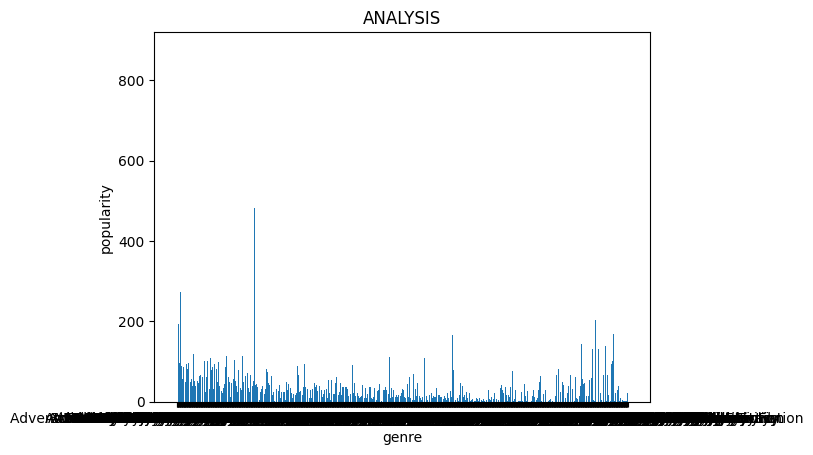

In [68]:
x=df['Movie_Genre']
y=df['Movie_Popularity']
plt.bar(x,y)

# Add labels and title
plt.xlabel('genre')
plt.ylabel('popularity')
plt.title('ANALYSIS')
plt.show()

FEATURES

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [70]:
tf=TfidfVectorizer()


In [71]:
x=tf.fit_transform(x)

In [72]:
x.shape

(4760, 22)

In [73]:
print(x)

  (0, 3)	0.567994993044323
  (0, 4)	0.8230320090230874
  (1, 9)	0.5472567572025355
  (1, 17)	0.5472567572025355
  (1, 0)	0.4142450317397563
  (1, 1)	0.4789792658051688
  (2, 7)	0.627239616473057
  (2, 2)	0.7788263372066537
  (3, 16)	0.7095830468532522
  (3, 6)	0.4588789948650055
  (3, 3)	0.5347167172345909
  (4, 6)	1.0
  (5, 14)	0.782002165752056
  (5, 6)	0.3176099072747343
  (5, 4)	0.536280299433075
  (6, 18)	0.3253553205418715
  (6, 8)	0.47881894745127623
  (6, 9)	0.4462328816161391
  (6, 17)	0.4462328816161391
  (6, 0)	0.3377751882924471
  (6, 1)	0.3905594498406914
  (7, 6)	0.3575069281897745
  (7, 9)	0.6603744378367137
  (7, 17)	0.6603744378367137
  (8, 16)	0.8397120676014654
  :	:
  (4747, 18)	0.5234538862407621
  (4747, 0)	0.5434358187009642
  (4747, 4)	0.6562572208610403
  (4748, 6)	1.0
  (4749, 6)	1.0
  (4750, 12)	1.0
  (4751, 12)	1.0
  (4752, 11)	0.6121933556529567
  (4752, 20)	0.6603136584009235
  (4752, 6)	0.25303971500984057
  (4752, 0)	0.35380230419162007
  (4753, 6)	1.0
 

GET SIMILARTY SCORE USING COSINE SIMILARITY

In [74]:
from sklearn.metrics.pairwise import cosine_similarity


In [75]:
similarity= cosine_similarity(x)

In [76]:
print(similarity)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.62723962 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.62723962 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [77]:
similarity.shape

(4760, 4760)

**TESTING**

In [78]:
fav_movie=input("enter your fav movie:").strip()

enter your fav movie:ster wars


In [96]:
listmovie=df['Movie_Title'].tolist()

In [97]:
import difflib

In [98]:
recommended=difflib.get_close_matches(fav_movie,listmovie)

In [99]:
print(recommended)

['Star Wars', 'Latter Days', 'After Earth']


In [100]:
index=df[df.Movie_Title == closestmatch]['Movie_ID'].values[0]

In [101]:
closestmatch=recommended[0]

**similarity score**

In [102]:
closestmatch

'Star Wars'

In [103]:
index

2

In [104]:
score=list(enumerate(similarity[index]))

In [105]:
score

[(0, 0.0),
 (1, 0.0),
 (2, 1.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.9311235638813233),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.30976232235242285),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.3469318541231704),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.5228783412382456),
 (58, 0.7582789857334113),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.5168014837120284),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.30976232235242285),
 (74, 0.0),
 (7

In [106]:
len(score)

4760

***Reccommended movies for you ***

In [107]:
yor_movies=sorted(score, key = lambda  x:x[1], reverse =True)
yor_movies


[(2, 1.0),
 (423, 1.0),
 (1307, 1.0),
 (1704, 1.0),
 (1720, 1.0),
 (1758, 1.0),
 (1800, 1.0),
 (1820, 1.0),
 (1979, 1.0),
 (2030, 1.0),
 (2135, 1.0),
 (2171, 1.0),
 (2263, 1.0),
 (2267, 1.0),
 (2372, 1.0),
 (2408, 1.0),
 (2462, 1.0),
 (2583, 1.0),
 (2704, 1.0),
 (2719, 1.0),
 (3138, 1.0),
 (3208, 1.0),
 (3457, 1.0),
 (3476, 1.0),
 (3505, 1.0),
 (3631, 1.0),
 (3816, 1.0),
 (3843, 1.0),
 (4146, 1.0),
 (4559, 1.0),
 (4662, 1.0),
 (794, 0.947884980667886),
 (1114, 0.947884980667886),
 (1711, 0.947884980667886),
 (14, 0.9311235638813233),
 (245, 0.9311235638813233),
 (391, 0.9311235638813233),
 (392, 0.9311235638813233),
 (1008, 0.9311235638813233),
 (1025, 0.9311235638813233),
 (1166, 0.9311235638813233),
 (1291, 0.9311235638813233),
 (1336, 0.9311235638813233),
 (1496, 0.9311235638813233),
 (1524, 0.9311235638813233),
 (1602, 0.9311235638813233),
 (1769, 0.9311235638813233),
 (1837, 0.9311235638813233),
 (2041, 0.9311235638813233),
 (2516, 0.9311235638813233),
 (2781, 0.9311235638813233),

**Top 30 Movie Suggested for You**

In [108]:
print('Top 30 Movie Suggested for You: \n')

i = 1

for movie in yor_movies:
  index=movie[0]
  title_from_index= df[df.index == index]['Movie_Title'].values[0]
  if (i < 31):
    print( i, '.',title_from_index)
    i+=1

Top 30 Movie Suggested for You: 

1 . Finding Nemo
2 . Madagascar
3 . Anastasia
4 . Madagascar: Escape 2 Africa
5 . Dinosaur
6 . WALL·E
7 . Dragon Hunters
8 . Pinocchio
9 . Lilo & Stitch
10 . Space Chimps
11 . Ponyo
12 . Alpha and Omega
13 . Pooh's Heffalump Movie
14 . Home on the Range
15 . The Rugrats Movie
16 . Coraline
17 . The Tigger Movie
18 . Hey Arnold! The Movie
19 . Despicable Me
20 . Rugrats Go Wild
21 . Space Dogs
22 . Tangled
23 . Kung Fu Panda 2
24 . A Turtle's Tale: Sammy's Adventures
25 . Winnie the Pooh
26 . Monsters University
27 . Turbo
28 . Madagascar 3: Europe's Most Wanted
29 . The Angry Birds Movie
30 . Henry & Me


**END**